<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
# This is only for IBM cloud service
# !wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

In [3]:
from urllib.request import urlretrieve

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv"
urlretrieve(url, "loan_train.csv")

('loan_train.csv', <http.client.HTTPMessage at 0x220a477e430>)

### Load Data From CSV File


In [4]:
df = pd.read_csv("loan_train.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object


In [6]:
# Re-organize the data to date time format
df["due_date"] = pd.to_datetime(df["due_date"])
df["effective_date"] = pd.to_datetime(df["effective_date"])

df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [7]:
df["loan_status"].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [8]:
# # notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

In [9]:
tryin = np.linspace(df.Principal.min(), df.Principal.max(), 10) 
print(tryin)

[ 300.          377.77777778  455.55555556  533.33333333  611.11111111
  688.88888889  766.66666667  844.44444444  922.22222222 1000.        ]


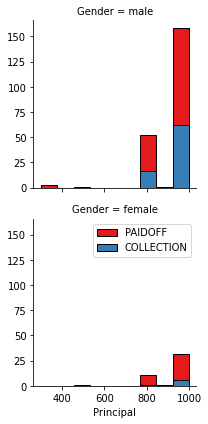

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)

# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html  -- sns.FacetGrid explain
# hue parameter plots different subsets of data in different colors.
# g will initialize the matplotlib figure and FacetGrid object
# palette = Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.
# https://www.cnblogs.com/shaocf/p/9600340.html -- palette options
# “Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=1)
g.map(plt.hist, 'Principal', bins=bins, ec="k")  # ec="k", or longer, edgecolor="black"

# https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch -- matplotlib 

g.axes[-1].legend()  # axes[] indicates which plot to showthe legend, 0 indicates the firdst plot and -1 means the last plot respectively
plt.show()

In [11]:
print(g.axes[-1])

AxesSubplot(0.170949,0.0967593;0.755316x0.387269)


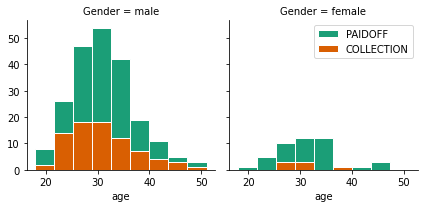

In [12]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Dark2", col_wrap=2)
g.map(plt.hist, "age", bins=bins, ec="white") 

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


In [13]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [14]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html?highlight=dt%20dayofweek# -- dt.dayofweek
df['dayofweek'] = df['effective_date'].dt.dayofweek  # The day of the week with Monday=0, Sunday=6.
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


[0. 1. 2. 3. 4. 5. 6.]


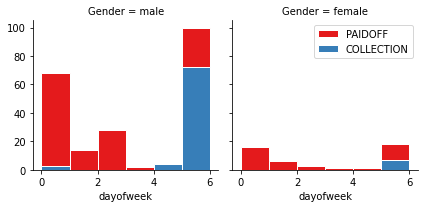

In [15]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 7)
print(bins)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, "dayofweek", bins=bins, ec="w")
g.axes[-1].legend()
plt.show() 


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [16]:
df["weekend"] = df["dayofweek"].apply(lambda day: 1 if (day>3) else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [17]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [18]:
df["Gender"].replace(to_replace=["male", "female"], value=[0, 1], inplace=True)  # male = 0, female = 1
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [19]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [20]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame


In [21]:
Feature = df[["Principal", "terms", "age", "Gender", "weekend"]]
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html -- get_dummies explain
Feature = pd.concat([Feature, pd.get_dummies(df["education"])], axis=1)
Feature.drop(["Master or Above"], axis=1, inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [22]:
X = Feature
X[0:5]
# print(type(X))  # <class 'pandas.core.frame.DataFrame'>

# Feature sets columns 
X_features = X.columns
print(X_features)

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')


In [23]:
X.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')

What are our lables?


In [24]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [25]:
# fit(X[, y, sample_weight]) - Compute the mean and std to be used for later scaling.
# transform(X[, copy]) - Perform standardization by centering and scaling.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.

#### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)  # Make train and test set

print("Train Set:", X_train[0:5], y_train[0:5])
print("----------------------------------------------")
print("Shape of Train Set", X_train.shape, y_train.shape)
print("----------------------------------------------")

print("Test Set:", X_test[0:5], y_test[0:5])
print("----------------------------------------------")
print("Shape of Test Set", X_test.shape, y_test.shape)
print("----------------------------------------------")

Train Set: [[ 0.51578458 -0.95911111  0.67333883 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.81902922 -0.42056004  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.01006414 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458 -0.95911111 -0.98484789 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.48739188 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]] ['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
----------------------------------------------
Shape of Train Set (276, 8) (276,)
----------------------------------------------
Test Set: [[ 0.51578458  0.92071769 -0.15575453 -0.42056004  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [-1.31458942 -0.95911111 -0.15575453 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458 -0.95911111  0.01006414 -0.42056004 -1.20577805 -0.38170062
   1.13639374

# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


#### K-NN Practice 

In [27]:
from sklearn.neighbors import KNeighborsClassifier as Knnclass

# KNN practice with k = 4

# Train the model
k = 4
neigh = Knnclass(n_neighbors=k).fit(X_train, y_train)
# neigh  # KNeighborsClassifier(n_neighbors=4)

# Predict the output
yhat = neigh.predict(X_test)
print(yhat[0:5])

# Calculate the accuracy 
# Accuracy Classification score is a function that computes subset accuracy. 
# This function is equal to the jaccard_score function. 
# Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.
from sklearn import metrics
print("Train Set Accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test Set Accuracy:", metrics.accuracy_score(y_test, yhat))

['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Train Set Accuracy: 0.8188405797101449
Test Set Accuracy: 0.7


#### K-NN Model Building and Testing

In [28]:
from sklearn.neighbors import KNeighborsClassifier as Knnclass
from sklearn import metrics

# Making a iterative loop to find the best k value

k_num = 20

# Make a list of zeros to be replaced by calculated error later
mean_acc = np.zeros((k_num))  # Accuracy Score
std_acc = np.zeros((k_num))  # Standard Deviation Error (Standard Error)

for k in range(1, k_num + 1): # loop k from 1 to 20
    # Train the model
    neighbor = Knnclass(n_neighbors = k).fit(X_train, y_train)
    
    # Predict the output
    y_predict_knn = neighbor.predict(X_test)
    
    # Calcualte the accuracy and store in the error list
    mean_acc[k-1] = metrics.accuracy_score(y_test, y_predict_knn)  # This is Accuracy Score (Jaccard_Score)
    std_acc[k-1] = np.std(y_predict_knn == y_test) / np.sqrt(y_predict_knn.shape[0])

# Print the accuracy array for Ks
print("Accuracy Score for different number of k:", mean_acc, "Maximum:", max(mean_acc))
print("Stand Error for different number of k:", std_acc, "Maximum:", max(std_acc))


Accuracy Score for different number of k: [0.65714286 0.58571429 0.74285714 0.7        0.74285714 0.71428571
 0.78571429 0.75714286 0.75714286 0.68571429 0.71428571 0.72857143
 0.7        0.68571429 0.68571429 0.71428571 0.7        0.72857143
 0.71428571 0.71428571] Maximum: 0.7857142857142857
Stand Error for different number of k: [0.05673323 0.05887676 0.05223852 0.05477226 0.05223852 0.05399492
 0.04904333 0.05125253 0.05125253 0.05548619 0.05399492 0.05315141
 0.05477226 0.05548619 0.05548619 0.05399492 0.05477226 0.05315141
 0.05399492 0.05399492] Maximum: 0.05887675520277078


In [29]:
# https://stackoverflow.com/questions/60123589/in-the-numpy-std-calculation-np-stdy-test-y-test-predict-what-is-the-mea
# a == b is the comparison operator and will return a bollean array, 
# then we can use the boolean array to calculate the standard error and see how accuracy is the model
a = np.array([0, 1, 0])
b = np.array([1, 1, 1])
print(a == b)  # [False True False]
print(np.std(a == b))  

[False  True False]
0.4714045207910317


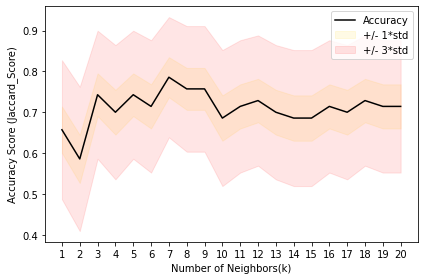

The best accuracy was 0.7857142857142857 with k = 7


In [30]:
# Plot the model accuracy for a different number of k neighbors
plt.plot(range(1, k_num + 1), mean_acc, "black")

# fill the gap in between 
# alpha controls the transparency
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(range(1, k_num + 1), mean_acc - 1*std_acc, mean_acc + 1*std_acc, alpha=0.1, color="gold")
plt.fill_between(range(1, k_num + 1), mean_acc - 3*std_acc, mean_acc + 3*std_acc, alpha=0.1, color="red")

plt.legend(("Accuracy", "+/- 1*std", "+/- 3*std"))
plt.xlabel("Number of Neighbors(k)")
plt.ylabel("Accuracy Score (Jaccard_Score)")
plt.xticks(np.array(range(1, k_num + 1)))
plt.tight_layout()
plt.show()

# Finall, we can print the accuracy along with the best k
# argmax() returns the indices of the maximum values along an axis
print("The best accuracy was", mean_acc.max(), "with k =", mean_acc.argmax() + 1)

### K-Nearest Neighbors Algorithm

Accuracy Score for different number of k: [0.65714286 0.58571429 0.74285714 0.7        0.74285714 0.71428571
 0.78571429 0.75714286 0.75714286 0.68571429 0.71428571 0.72857143
 0.7        0.68571429 0.68571429 0.71428571 0.7        0.72857143
 0.71428571 0.71428571] Maximum: 0.7857142857142857
Stand Error for different number of k: [0.05673323 0.05887676 0.05223852 0.05477226 0.05223852 0.05399492
 0.04904333 0.05125253 0.05125253 0.05548619 0.05399492 0.05315141
 0.05477226 0.05548619 0.05548619 0.05399492 0.05477226 0.05315141
 0.05399492 0.05399492] Maximum: 0.05887675520277078


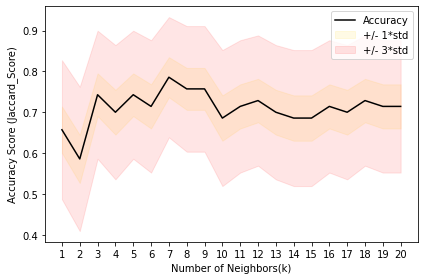

The best accuracy was 0.7857142857142857 with k = 7
The Jaccard Score is: 0.5896
The Average F1-Score is: 0.7206


In [31]:
def Knn_Algo(K, Training_Set_X, Training_Set_Y, Testing_Set_X, Testing_Set_Y): 
    
    from sklearn.neighbors import KNeighborsClassifier as Knnclass
    from sklearn import metrics
    from sklearn.metrics import jaccard_score
    from sklearn.metrics import f1_score
    
    # Making a iterative loop to find the best k value
    k_num = K

    # Make a list of zeros to be replaced by calculated error later
    mean_acc = np.zeros((k_num))  # Accuracy Score
    std_acc = np.zeros((k_num))  # Standard Deviation Error (Standard Error)

    for k in range(1, k_num + 1): # loop k from 1 to 20
        # Train the model
        neighbor = Knnclass(n_neighbors = k).fit(Training_Set_X, Training_Set_Y)
    
        # Predict the output
        y_predict_knn = neighbor.predict(Testing_Set_X)
    
        # Calcualte the accuracy and store in the error list
        mean_acc[k-1] = metrics.accuracy_score(Testing_Set_Y, y_predict_knn)  # This is Accuracy Score (Jaccard_Score)
        std_acc[k-1] = np.std(y_predict_knn == Testing_Set_Y) / np.sqrt(y_predict_knn.shape[0])

    # Print the accuracy array for Ks
    print("Accuracy Score for different number of k:", mean_acc, "Maximum:", max(mean_acc))
    print("Stand Error for different number of k:", std_acc, "Maximum:", max(std_acc))
    
    # Plot the model accuracy for a different number of k neighbors
    plt.plot(range(1, k_num + 1), mean_acc, "black")

    # fill the gap in between 
    # alpha controls the transparency
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
    plt.fill_between(range(1, k_num + 1), mean_acc - 1*std_acc, mean_acc + 1*std_acc, alpha=0.1, color="gold")
    plt.fill_between(range(1, k_num + 1), mean_acc - 3*std_acc, mean_acc + 3*std_acc, alpha=0.1, color="red")

    plt.legend(("Accuracy", "+/- 1*std", "+/- 3*std"))
    plt.xlabel("Number of Neighbors(k)")
    plt.ylabel("Accuracy Score (Jaccard_Score)")
    plt.xticks(np.array(range(1, k_num + 1)))
    plt.tight_layout()
    plt.show()
    
    # Finall, we can print the accuracy along with the best k
    # argmax() returns the indices of the maximum values along an axis
    print("The best accuracy was", mean_acc.max(), "with k =", mean_acc.argmax() + 1)
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
    print("The Jaccard Score is: %.4f" % jaccard_score(Testing_Set_Y, y_predict_knn, average="weighted")) # pos_label='PAIDOFF'
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
    print("The Average F1-Score is: %.4f" % f1_score(Testing_Set_Y, y_predict_knn, average="weighted"))
    
Knn_Algo(20, X_train, y_train, X_test, y_test)
    

# Decision Tree


In [32]:
# X_train, y_train, X_test, y_test

#### Decision Tree Model Building and Testing

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create an instance of the DecisionTreeClassifier 
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Specify criterion="entropy" so we can see the information gain of each node
DTclass = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# DTclass # DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Train the Decision Tree model
DTclass.fit(X_train, y_train)

# Predict the output
y_predict_dt = DTclass.predict(X_test)

# calculate the accuracy 
print("Accuracy Score for Decision Tree:", metrics.accuracy_score(y_test, y_predict_dt))


Accuracy Score for Decision Tree: 0.6142857142857143


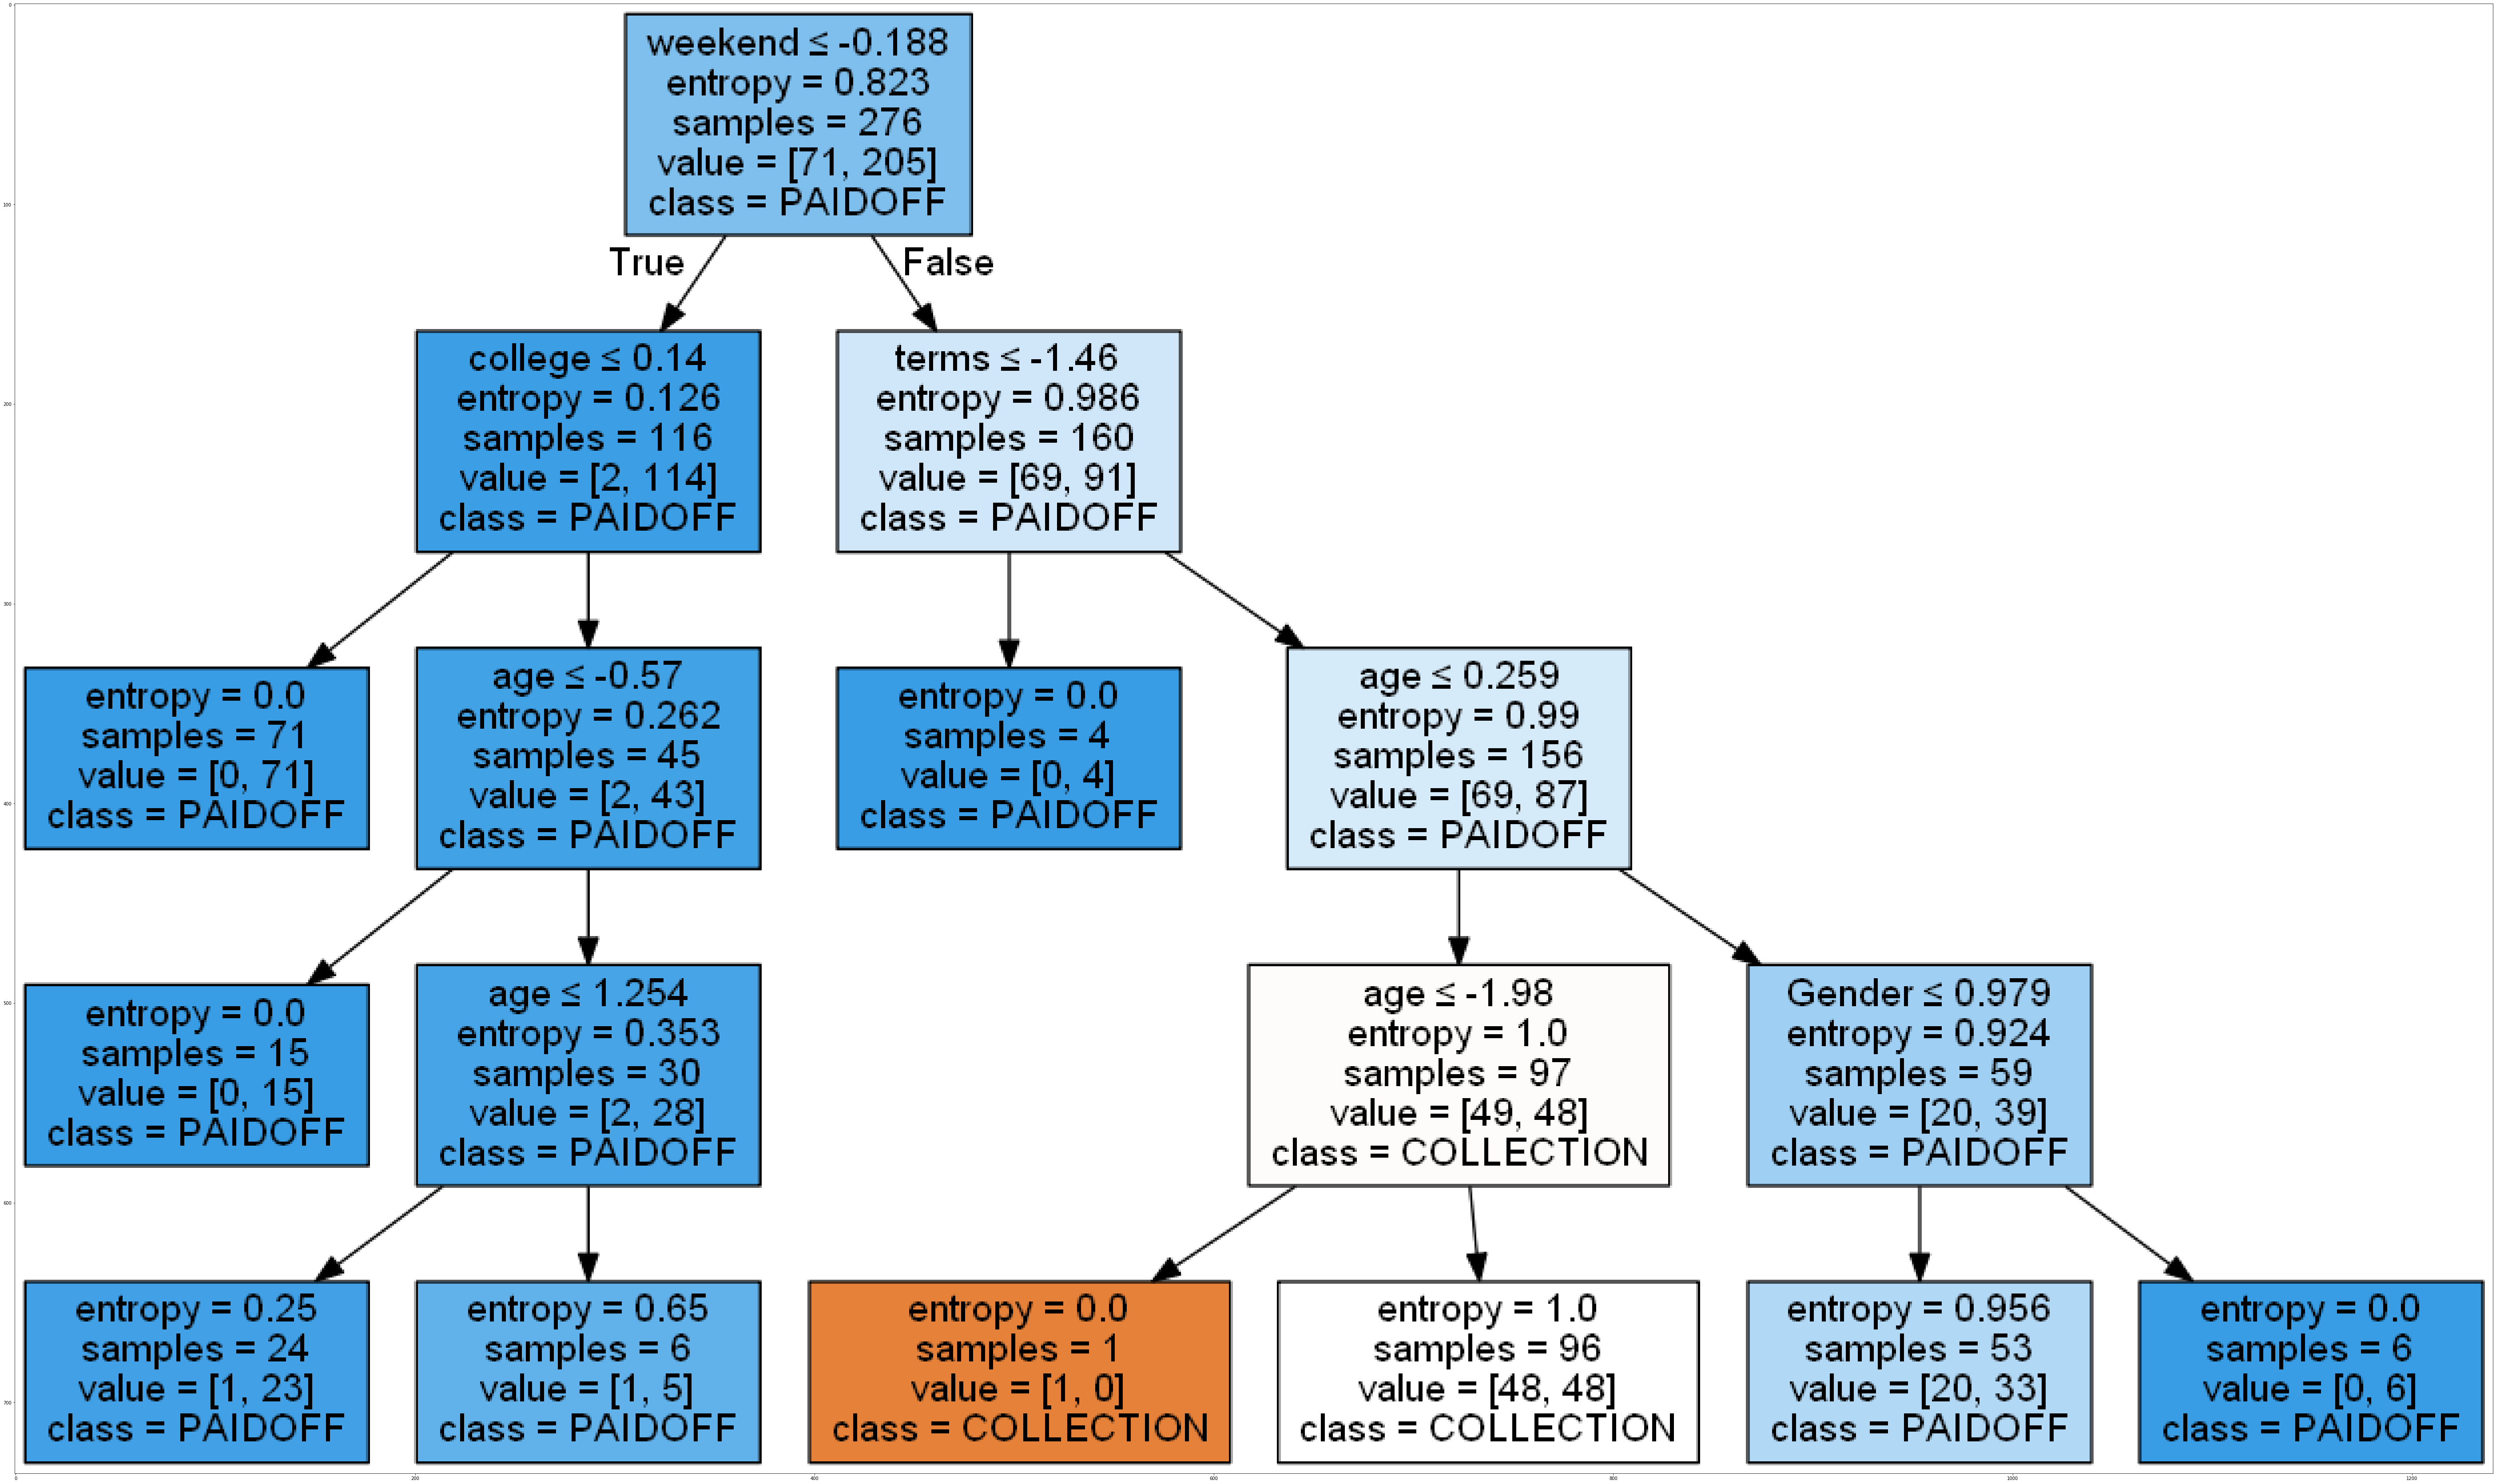

In [34]:
# Install the pydotplus and graphviz libraries
# !pip install pydotplus
# !pip install graphviz

from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

# https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/118496/ -- StringIO
dot_data = StringIO()
filename = "loan_tree.png"

# np.unique - https://numpy.org/doc/stable/reference/generated/numpy.unique.html
# tree.export_graphviz - https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
# Make an instance of export_graphviz
output = tree.export_graphviz(DTclass, feature_names=X_features, out_file=dot_data, class_names=np.unique(y_train), filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)

plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation="nearest")



### Decision Tree Algorithm

Accuracy Score for Decision Tree: 0.6142857142857143
The Jaccard Score is: 0.4931
The Average F1-Score is: 0.6446


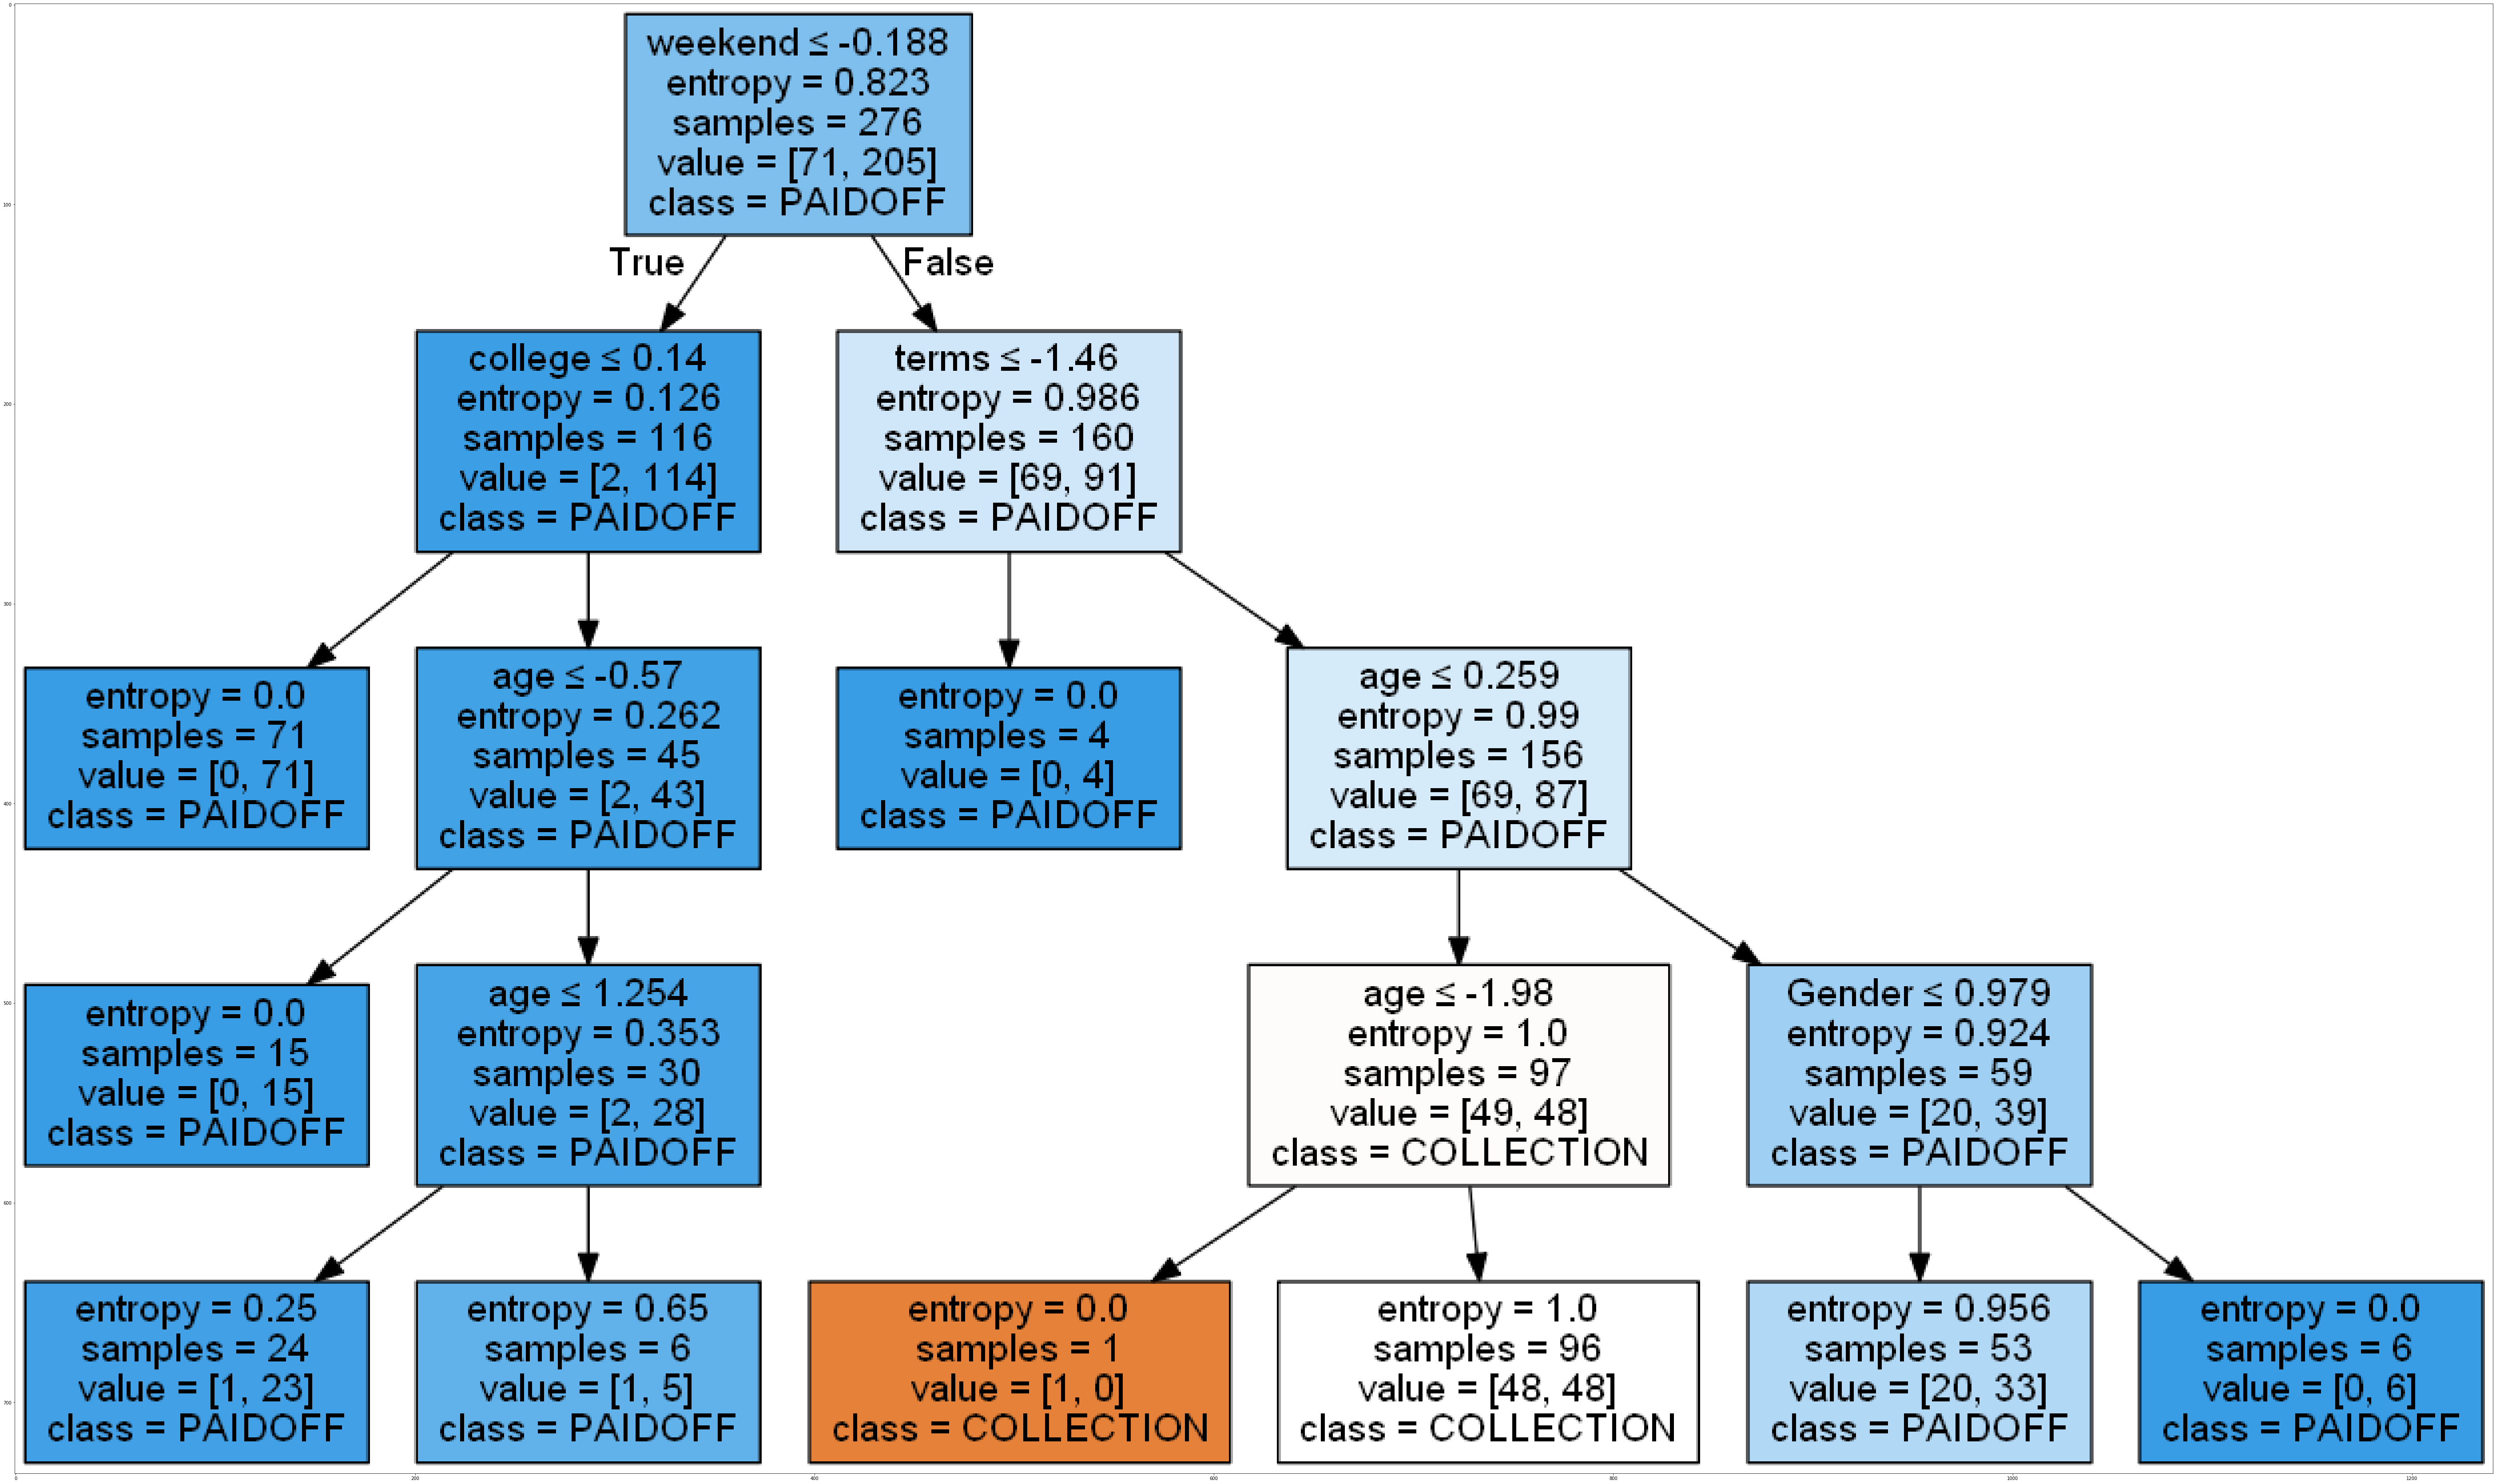

In [35]:
def DT_Algo(Features_Name, Training_Set_X, Training_Set_Y, Testing_Set_X, Testing_Set_Y):
    
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import metrics
    from sklearn.metrics import jaccard_score
    from sklearn.metrics import f1_score

    # Create an instance of the DecisionTreeClassifier 
    # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    # Specify criterion="entropy" so we can see the information gain of each node
    DTclass = DecisionTreeClassifier(criterion="entropy", max_depth=4)
    # DTclass # DecisionTreeClassifier(criterion='entropy', max_depth=4)

    # Train the Decision Tree model
    DTclass.fit(Training_Set_X, Training_Set_Y)
    
    # Predict the output
    y_predict_dt = DTclass.predict(Testing_Set_X)
    
    # calculate the accuracy 
    print("Accuracy Score for Decision Tree:", metrics.accuracy_score(Testing_Set_Y, y_predict_dt))
    
    # Install the pydotplus and graphviz libraries
    # !pip install pydotplus
    # !pip install graphviz

    from io import StringIO
    import pydotplus
    import matplotlib.image as mpimg
    from sklearn import tree
    %matplotlib inline

    # https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/118496/ -- StringIO
    dot_data = StringIO()
    filename = "loan_tree.png"

    # np.unique - https://numpy.org/doc/stable/reference/generated/numpy.unique.html
    # tree.export_graphviz - https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
    # Make an instance of export_graphviz
    output = tree.export_graphviz(DTclass, feature_names=Features_Name, out_file=dot_data, class_names=np.unique(Training_Set_Y), filled=True, special_characters=True, rotate=False)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(filename)

    img = mpimg.imread(filename)

    plt.figure(figsize=(100, 200))
    plt.imshow(img, interpolation="nearest")
    
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
    print("The Jaccard Score is: %.4f" % jaccard_score(Testing_Set_Y, y_predict_dt, average="weighted")) # pos_label='PAIDOFF'
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
    print("The Average F1-Score is: %.4f" % f1_score(Testing_Set_Y, y_predict_dt, average="weighted"))

    
DT_Algo(X_features, X_train, y_train, X_test, y_test)

# Support Vector Machine


The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results.

In [36]:
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

# Create an instance of the Support Vector Classification
svm = svm.SVC(kernel="rbf")

# Train the Support Vector Model
svm.fit(X_train, y_train)

# Predict the output
y_predict_svm = svm.predict(X_test)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
print("The Jaccard Score is: %.4f" % jaccard_score(y_test, y_predict_svm, average="weighted")) # pos_label='PAIDOFF'
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
print("The Average F1-Score is: %.4f" % f1_score(y_test, y_predict_svm, average="weighted"))

The Jaccard Score is: 0.6104
The Average F1-Score is: 0.7276


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Compute Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_predict_svm, labels=['PAIDOFF', 'COLLECTION'])
# np.set_printoptions - https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html
np.set_printoptions(precision=2) # Number of digits of precision for floating point output

print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report(y_test, y_predict_svm))

Confusion Matrix:
 [[48  7]
 [11  4]]
Classification Report:
               precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



In [38]:
# # Make a function to plot Confusion Matrix
# def plot_confusion_matrix_test(confusion_matrix, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
#     """This function prints and plots the confustion matrix. 
#        Normalization can be applied by setting "normalize=True"
#     """
    
#     import itertools
#     # itertools libraries -- https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/364249/ 
    
#     if normalize:
#         confusion_matrix = confusion_matrix.astype("float") / confusion_matrix(axis=1)[ : , np.newaxis]
#         # np.newaxis -- https://www.itread01.com/content/1547568207.html 
#         # array([[55],
#         #       [15]], dtype=int64)
#         print("Normalized Confusion Matrix")
#     else: 
#         print("Confusion Matrix, without Normalization")
        
#     print(confusion_matrix)
    
#     # plt.imshow - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html 
#     plt.imshow(confusion_matrix, interpolation="nearest", cmap=cmap)  
#     plt.title(title)
#     plt.colorbar()
    
#     ticker_marks = np.arange(len(classes))
#     plt.xticks(ticker_marks, classes, rotation=45)
#     plt.yticks(ticker_marks, classes)
    
#     fmt = ".2f" if normalize else "d"
#     thresh = confusion_matrix.max() / 2.
    
#     for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
#         plt.text(j, i, format(confusion_matrix[i, j], fmt), 
#                  horizontalalignment="center", 
#                  color="white" if confusion_matrix[i, j] > thresh else "black")
    
#     plt.tight_layout()
#     plt.ylabel("True Label")
#     plt.xlabel("Predicted Label")

In [39]:
# plt.figure()
# plot_confusion_matrix_test(confusion_matrix, classes=['PAIDOFF', 'COLLECTION'], normalize=False, title="Confusion Matrix")

### Support Vector Machine Algorithm

In [40]:
def SVM_Algo(Training_Set_X, Training_Set_Y, Testing_Set_X, Testing_Set_Y, normalize=False, cmap=plt.cm.Blues):    
    """This function prints and plots the confustion matrix. 
       Normalization can be applied by setting "normalize=True"
    """
    
    from sklearn.svm import SVC
    from sklearn.metrics import jaccard_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix
    import itertools
    # itertools libraries -- https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/364249/ 
    
    functions = ["linear", "poly", "rbf", "sigmoid"]
    classifiers = list()
    
    # Create instance list of the Support Vector Classification
    for function in functions: 
        classifiers.append(SVC(kernel=function))
        
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    i = 0
    
    # axes.flatten() -- https://www.itread01.com/content/1544037666.html
    for classifier, ax in zip(classifiers, axes.flatten()):
        
        # Train the Support Vector Model
        classifier.fit(Training_Set_X, Training_Set_Y)
        
        # Predict the output
        y_predict_svm = classifier.predict(Testing_Set_X)
        
        # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
        print("The Jaccard Score of function {} is: %.4f".format(function) % jaccard_score(Testing_Set_Y, y_predict_svm, average="weighted")) # pos_label='PAIDOFF'
        # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
        print("The Average F1-Score of function {} is: %.4f".format(function) % f1_score(Testing_Set_Y, y_predict_svm, average="weighted"))
        
        # Compute Confusion Matrix
        cfm = confusion_matrix(Testing_Set_Y, y_predict_svm)
        # np.set_printoptions - https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html
        np.set_printoptions(precision=2) # Number of digits of precision for floating point output
        
        if normalize:
            cfm = cfm.astype("float") / cfm(axis=1)[ : , np.newaxis]
            # np.newaxis -- https://www.itread01.com/content/1547568207.html 
            # array([[55],
            #       [15]], dtype=int64)
            print("Normalized Confusion Matrix")
        else: 
            print("Confusion Matrix, without Normalization")
            
        print("Confusion Matrix of function '{}':\n".format(functions[i]), cfm)
        print("Classification Report of function '{}':\n".format(functions[i]), classification_report(Testing_Set_Y, y_predict_svm))
        i += 1
        
        # Plot the confusion matrix
        # https://www.examplefiles.net/cs/354322
        plot_confusion_matrix(classifier, Testing_Set_X, Testing_Set_Y, ax=ax, cmap=cmap)
        ax.title.set_text(type(classifier).__name__)
        
        print("-------------------------------------------------------------------------------------------------------")
    
    plt.tight_layout()
    plt.show()
 

The Jaccard Score of function sigmoid is: 0.6173
The Average F1-Score of function sigmoid is: 0.6914
Confusion Matrix, without Normalization
Confusion Matrix of function 'linear':
 [[ 0 15]
 [ 0 55]]
Classification Report of function 'linear':
               precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        15
     PAIDOFF       0.79      1.00      0.88        55

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

-------------------------------------------------------------------------------------------------------
The Jaccard Score of function sigmoid is: 0.6161
The Average F1-Score of function sigmoid is: 0.7065
Confusion Matrix, without Normalization
Confusion Matrix of function 'poly':
 [[ 1 14]
 [ 2 53]]
Classification Report of function 'poly':
               precision    recall  f1-score   support

  COLLECTION       0.33     

C:\Users\Administrator\anaconda3\envs\py3env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\py3env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\py3env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

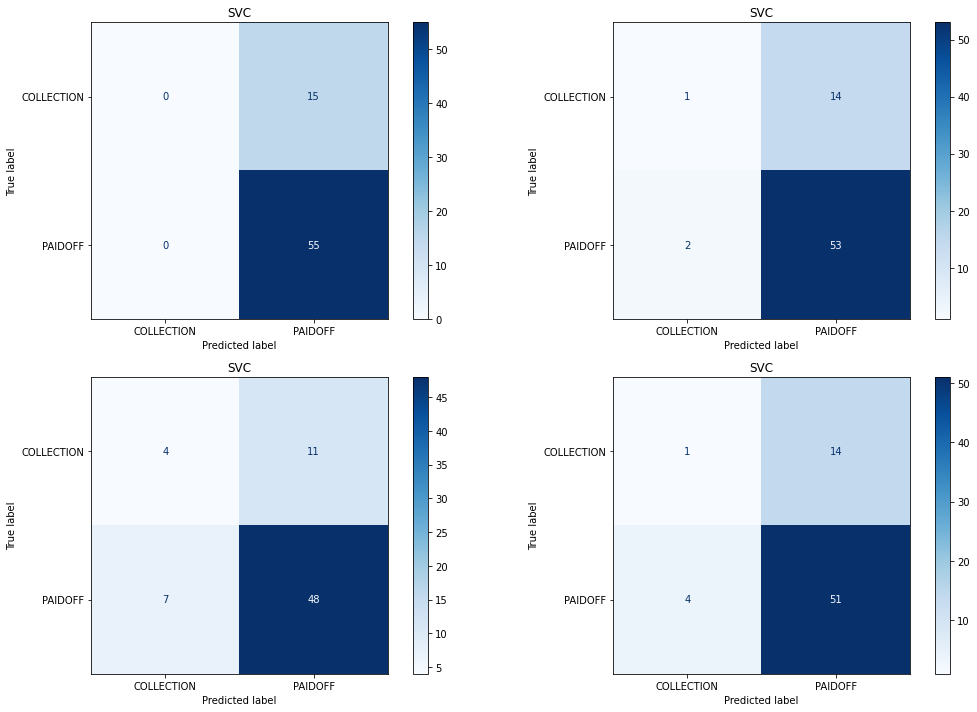

In [41]:
SVM_Algo(X_train, y_train, X_test, y_test, normalize=False, cmap=plt.cm.Blues)

# Logistic Regression


In [42]:
# X_train, y_train, X_test, y_test

#### Logistic Regression Building and Testing

The Probability Estimation of All classes:
 [[0.5  0.5 ]
 [0.45 0.55]
 [0.31 0.69]
 [0.34 0.66]
 [0.32 0.68]
 [0.32 0.68]
 [0.49 0.51]
 [0.48 0.52]
 [0.34 0.66]
 [0.49 0.51]]
The Jaccard Score is: 0.5494
The Average F1-Score is: 0.6671
Log Loss:
 0.5772287609479654
Confusion Matrix:
 [[ 2 13]
 [ 9 46]]
Classification Report:
               precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



C:\Users\Administrator\anaconda3\envs\py3env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


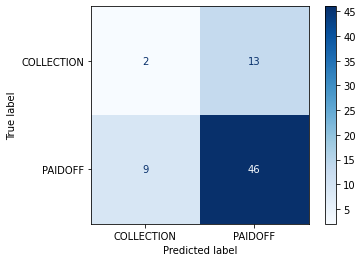

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix, log_loss


# Create an instance of the Logistic Regression
# The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models. 
# C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization.
LogisticR = LogisticRegression(C=0.01, solver="liblinear")

# Train the Logistic Regression Model
LogisticR.fit(X_train, y_train)

# Predict the output
y_predict_logisticR = LogisticR.predict(X_test)

# Predict the probability estimate fo all classes
# predict_proba returns estimates for all classes, ordered by the label of classes. 
# So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X)
y_predict_prob = LogisticR.predict_proba(X_test)
print("The Probability Estimation of All classes:\n", y_predict_prob[0:10])

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
print("The Jaccard Score is: %.4f" % jaccard_score(y_test, y_predict_logisticR, average="weighted"))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
print("The Average F1-Score is: %.4f" % f1_score(y_test, y_predict_logisticR, average="weighted"))
print("Log Loss:\n", log_loss(y_test, y_predict_prob))

# Compute Confusion Matrix
confusion_mx = confusion_matrix(y_test, y_predict_logisticR)
# np.set_printoptions - https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html
np.set_printoptions(precision=2) # Number of digits of precision for floating point output
print("Confusion Matrix:\n", confusion_mx)
print("Classification Report:\n", classification_report(y_test, y_predict_logisticR))


# Plot the confusion matrix
# https://www.examplefiles.net/cs/354322
plot_confusion_matrix(LogisticR, X_test, y_test, cmap="Blues")


Based on the count of each section, we can calculate precision and recall of each label:

*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels

### Logistic RegressionAlgorithm

In [44]:
def LogisticRegression_Algo(Training_Set_X, Training_Set_Y, Testing_Set_X, Testing_Set_Y, normalize=False, cmap=plt.cm.Blues):    
    """This function prints and plots the confustion matrix. 
       Normalization can be applied by setting "normalize=True"
    """
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import jaccard_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix, log_loss


    # Create an instance of the Logistic Regression
    # The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models. 
    # C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization.
    LogisticR = LogisticRegression(C=0.01, solver="liblinear")

    # Train the Logistic Regression Model
    LogisticR.fit(Training_Set_X, Training_Set_Y)

    # Predict the output
    y_predict_logisticR = LogisticR.predict(Testing_Set_X)

    # Predict the probability estimate fo all classes
    # predict_proba returns estimates for all classes, ordered by the label of classes. 
    # So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X)
    y_predict_prob = LogisticR.predict_proba(Testing_Set_X)
    print("The Probability Estimation of All classes:\n", y_predict_prob[0:10])

    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
    print("The Jaccard Score is: %.4f" % jaccard_score(Testing_Set_Y, y_predict_logisticR, average="weighted"))
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
    print("The Average F1-Score is: %.4f" % f1_score(Testing_Set_Y, y_predict_logisticR, average="weighted"))
    print("Log Loss:", log_loss(Testing_Set_Y, y_predict_prob))

    
    # Compute Confusion Matrix
    confusion_mx = confusion_matrix(Testing_Set_Y, y_predict_logisticR)
    # np.set_printoptions - https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html
    np.set_printoptions(precision=2) # Number of digits of precision for floating point output
    
    if normalize:
        confusion_mx = confusion_mx.astype("float") / confusion_mx(axis=1)[ : , np.newaxis]
        # np.newaxis -- https://www.itread01.com/content/1547568207.html 
        # array([[55],
        #       [15]], dtype=int64)
        print("Normalized Confusion Matrix")
    else: 
        print("Confusion Matrix, without Normalization")
    
    print("Confusion Matrix:\n", confusion_mx)
    print("Classification Report:\n", classification_report(Testing_Set_Y, y_predict_logisticR))


    # Plot the confusion matrix
    # https://www.examplefiles.net/cs/354322
    plot_confusion_matrix(LogisticR, Testing_Set_X, Testing_Set_Y, cmap=cmap)


The Probability Estimation of All classes:
 [[0.5  0.5 ]
 [0.45 0.55]
 [0.31 0.69]
 [0.34 0.66]
 [0.32 0.68]
 [0.32 0.68]
 [0.49 0.51]
 [0.48 0.52]
 [0.34 0.66]
 [0.49 0.51]]
The Jaccard Score is: 0.5494
The Average F1-Score is: 0.6671
Log Loss: 0.5772287609479654
Confusion Matrix, without Normalization
Confusion Matrix:
 [[ 2 13]
 [ 9 46]]
Classification Report:
               precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



C:\Users\Administrator\anaconda3\envs\py3env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


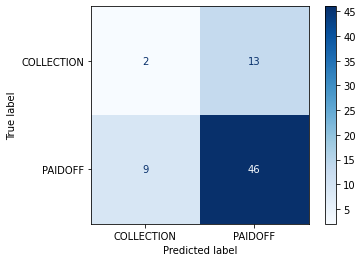

In [45]:
LogisticRegression_Algo(X_train, y_train, X_test, y_test)

# Model Evaluation using Test set


In [46]:
# Import required libraries
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

First, download and load the test set:


In [47]:
# !wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

In [48]:
from urllib.request import urlretrieve

url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv"
urlretrieve(url, "loan_test.csv")

('loan_test.csv', <http.client.HTTPMessage at 0x220a896d880>)

### Load Test set for evaluation


In [49]:
# Data Cleaning & Preprocessing of Training Data

import pandas as pd
import numpy as np
from sklearn import preprocessing

# Load the dataset
train_data_df = pd.read_csv("loan_train.csv")
# Reorganize the data to datetime format
train_data_df["due_date"] = pd.to_datetime(train_data_df["due_date"])
train_data_df["effective_date"] = pd.to_datetime(train_data_df["effective_date"])
# Add another column called "dayofweek"
# The day of the week with Monday=0, Sunday=6
train_data_df["dayofweek"] = train_data_df["effective_date"].dt.dayofweek
# Add another column called "weekend"
train_data_df["weekend"] = train_data_df["dayofweek"].apply(lambda day: 1 if (day>3) else 0)  # Friday, Saturday, Sunday = 1 else 0

# Groupby gender
# train_data_df.groupby(["Gender"])["loan_status"].value_counts(normalize=True)
# Convert categorial features to numerical values
train_data_df["Gender"].replace(to_replace=["male", "female"], value=[0, 1], inplace=True) # Set male = 0 and female = 1
# Groupby education
# train_data_df.groupby(["education"])["loan_status"].value_counts(normalize=True)

# Set Feature Set
FeatureSet_Train = train_data_df[["Principal", "terms", "age", "Gender", "weekend"]]
# Get dummies for the column of education
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html -- get_dummies explain
FeatureSet_Train = pd.concat([FeatureSet_Train, pd.get_dummies(train_data_df["education"])], axis=1)
FeatureSet_Train.drop(["Master or Above"], axis=1, inplace=True)

# Make training data of X  
X_TrainSet = FeatureSet_Train
# Feature Set Columns 
X_TrainSet_Features = X_TrainSet.columns
# fit(X[, y, sample_weight]) - Compute the mean and std to be used for later scaling.
# transform(X[, copy]) - Perform standardization by centering and scaling.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 
# Perform standarization, Standardize features by removing the mean and scaling to unit variance
X_TrainSet = preprocessing.StandardScaler().fit(X_TrainSet).transform(X_TrainSet)
print(X_TrainSet[0:5])

# Making training data of y
y_TrainSet = train_data_df["loan_status"].values
print(y_TrainSet[0:5])



[[ 0.52  0.92  2.33 -0.42 -1.21 -0.38  1.14 -0.87]
 [ 0.52  0.92  0.34  2.38 -1.21  2.62 -0.88 -0.87]
 [ 0.52 -0.96 -0.65 -0.42 -1.21 -0.38 -0.88  1.15]
 [ 0.52  0.92 -0.49  2.38  0.83 -0.38 -0.88  1.15]
 [ 0.52  0.92 -0.32 -0.42  0.83 -0.38 -0.88  1.15]]
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [50]:
# Data Cleaning & Preprocessing of Testing Data

import pandas as pd
import numpy as np
from sklearn import preprocessing

# Load the dataset
test_data_df = pd.read_csv('loan_test.csv')
# Reorganize the data to datetime format
test_data_df["due_date"] = pd.to_datetime(test_data_df["due_date"])
test_data_df["effective_date"] = pd.to_datetime(test_data_df["effective_date"])
# Add another column called "dayofweek"
# The day of the week with Monday=0, Sunday=6
test_data_df["dayofweek"] = test_data_df["effective_date"].dt.dayofweek
# Add another column called "weekend"
test_data_df["weekend"] = test_data_df["dayofweek"].apply(lambda day: 1 if (day>3) else 0)  # Friday, Saturday, Sunday = 1 else 0

# Groupby gender
# test_data_df.groupby(["Gender"])["loan_status"].value_counts(normalize=True)
# Convert categorial features to numerical values
test_data_df["Gender"].replace(to_replace=["male", "female"], value=[0, 1], inplace=True) # Set male = 0 and female = 1
# Groupby education
# test_data_df.groupby(["education"])["loan_status"].value_counts(normalize=True)

# Set Feature Set
FeatureSet_Test = test_data_df[["Principal", "terms", "age", "Gender", "weekend"]]
# Get dummies for the column of education
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html -- get_dummies explain
FeatureSet_Test = pd.concat([FeatureSet_Test, pd.get_dummies(test_data_df["education"])], axis=1)
FeatureSet_Test.drop(["Master or Above"], axis=1, inplace=True)

# Make training data of X  
X_TestSet = FeatureSet_Test
# Feature Set Columns 
X_TestSet_Features = X_TestSet.columns
# fit(X[, y, sample_weight]) - Compute the mean and std to be used for later scaling.
# transform(X[, copy]) - Perform standardization by centering and scaling.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 
# Perform standarization, Standardize features by removing the mean and scaling to unit variance
X_TestSet = preprocessing.StandardScaler().fit(X_TestSet).transform(X_TestSet)
print(X_TestSet[0:5])

# Making training data of y
y_TestSet = test_data_df["loan_status"].values
print(y_TestSet[0:5])


[[ 0.49  0.93  3.06  1.98 -1.3   2.4  -0.8  -0.86]
 [-3.56 -1.7   0.53 -0.51  0.77 -0.42 -0.8  -0.86]
 [ 0.49  0.93  1.88  1.98  0.77 -0.42  1.25 -0.86]
 [ 0.49  0.93 -0.98 -0.51  0.77 -0.42 -0.8   1.16]
 [-0.67 -0.79 -0.48 -0.51  0.77  2.4  -0.8  -0.86]]
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


So now we have four data sets: X_TrainSet, y_TrainSet, X_TestSet, y_TestSet.

Then we can perform the model evaluation: KNN, Decision Tree, Support Vector Machine and Logistic Regression

1. Knn_Algo(K, Training_Set_X, Training_Set_Y, Testing_Set_X, Testing_Set_Y)
2. DT_Algo(Features_Name, Training_Set_X, Training_Set_Y, Testing_Set_X, Testing_Set_Y)
3. SVM_Algo(Training_Set_X, Training_Set_Y, Testing_Set_X, Testing_Set_Y, normalize=False, cmap=plt.cm.Blues)
4. LogisticRegression_Algo(Training_Set_X, Training_Set_Y, Testing_Set_X, Testing_Set_Y, normalize=False, cmap=plt.cm.Blues)

Accuracy Score for different number of k: [0.72 0.69 0.67 0.63 0.74 0.69 0.74 0.69 0.69 0.69 0.67 0.69 0.7  0.7
 0.7  0.7  0.72 0.72 0.72 0.74] Maximum: 0.7407407407407407
Stand Error for different number of k: [0.06 0.06 0.06 0.07 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06
 0.06 0.06 0.06 0.06 0.06 0.06] Maximum: 0.06571489474350332


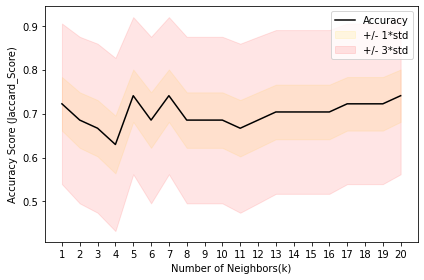

The best accuracy was 0.7407407407407407 with k = 5
The Jaccard Score is: 0.5832
The Average F1-Score is: 0.7007


In [51]:
# K-Nearest Neighbor 
Knn_Algo(20, X_TrainSet, y_TrainSet, X_TestSet, y_TestSet)

Accuracy Score for Decision Tree: 0.7777777777777778
The Jaccard Score is: 0.6183
The Average F1-Score is: 0.7284


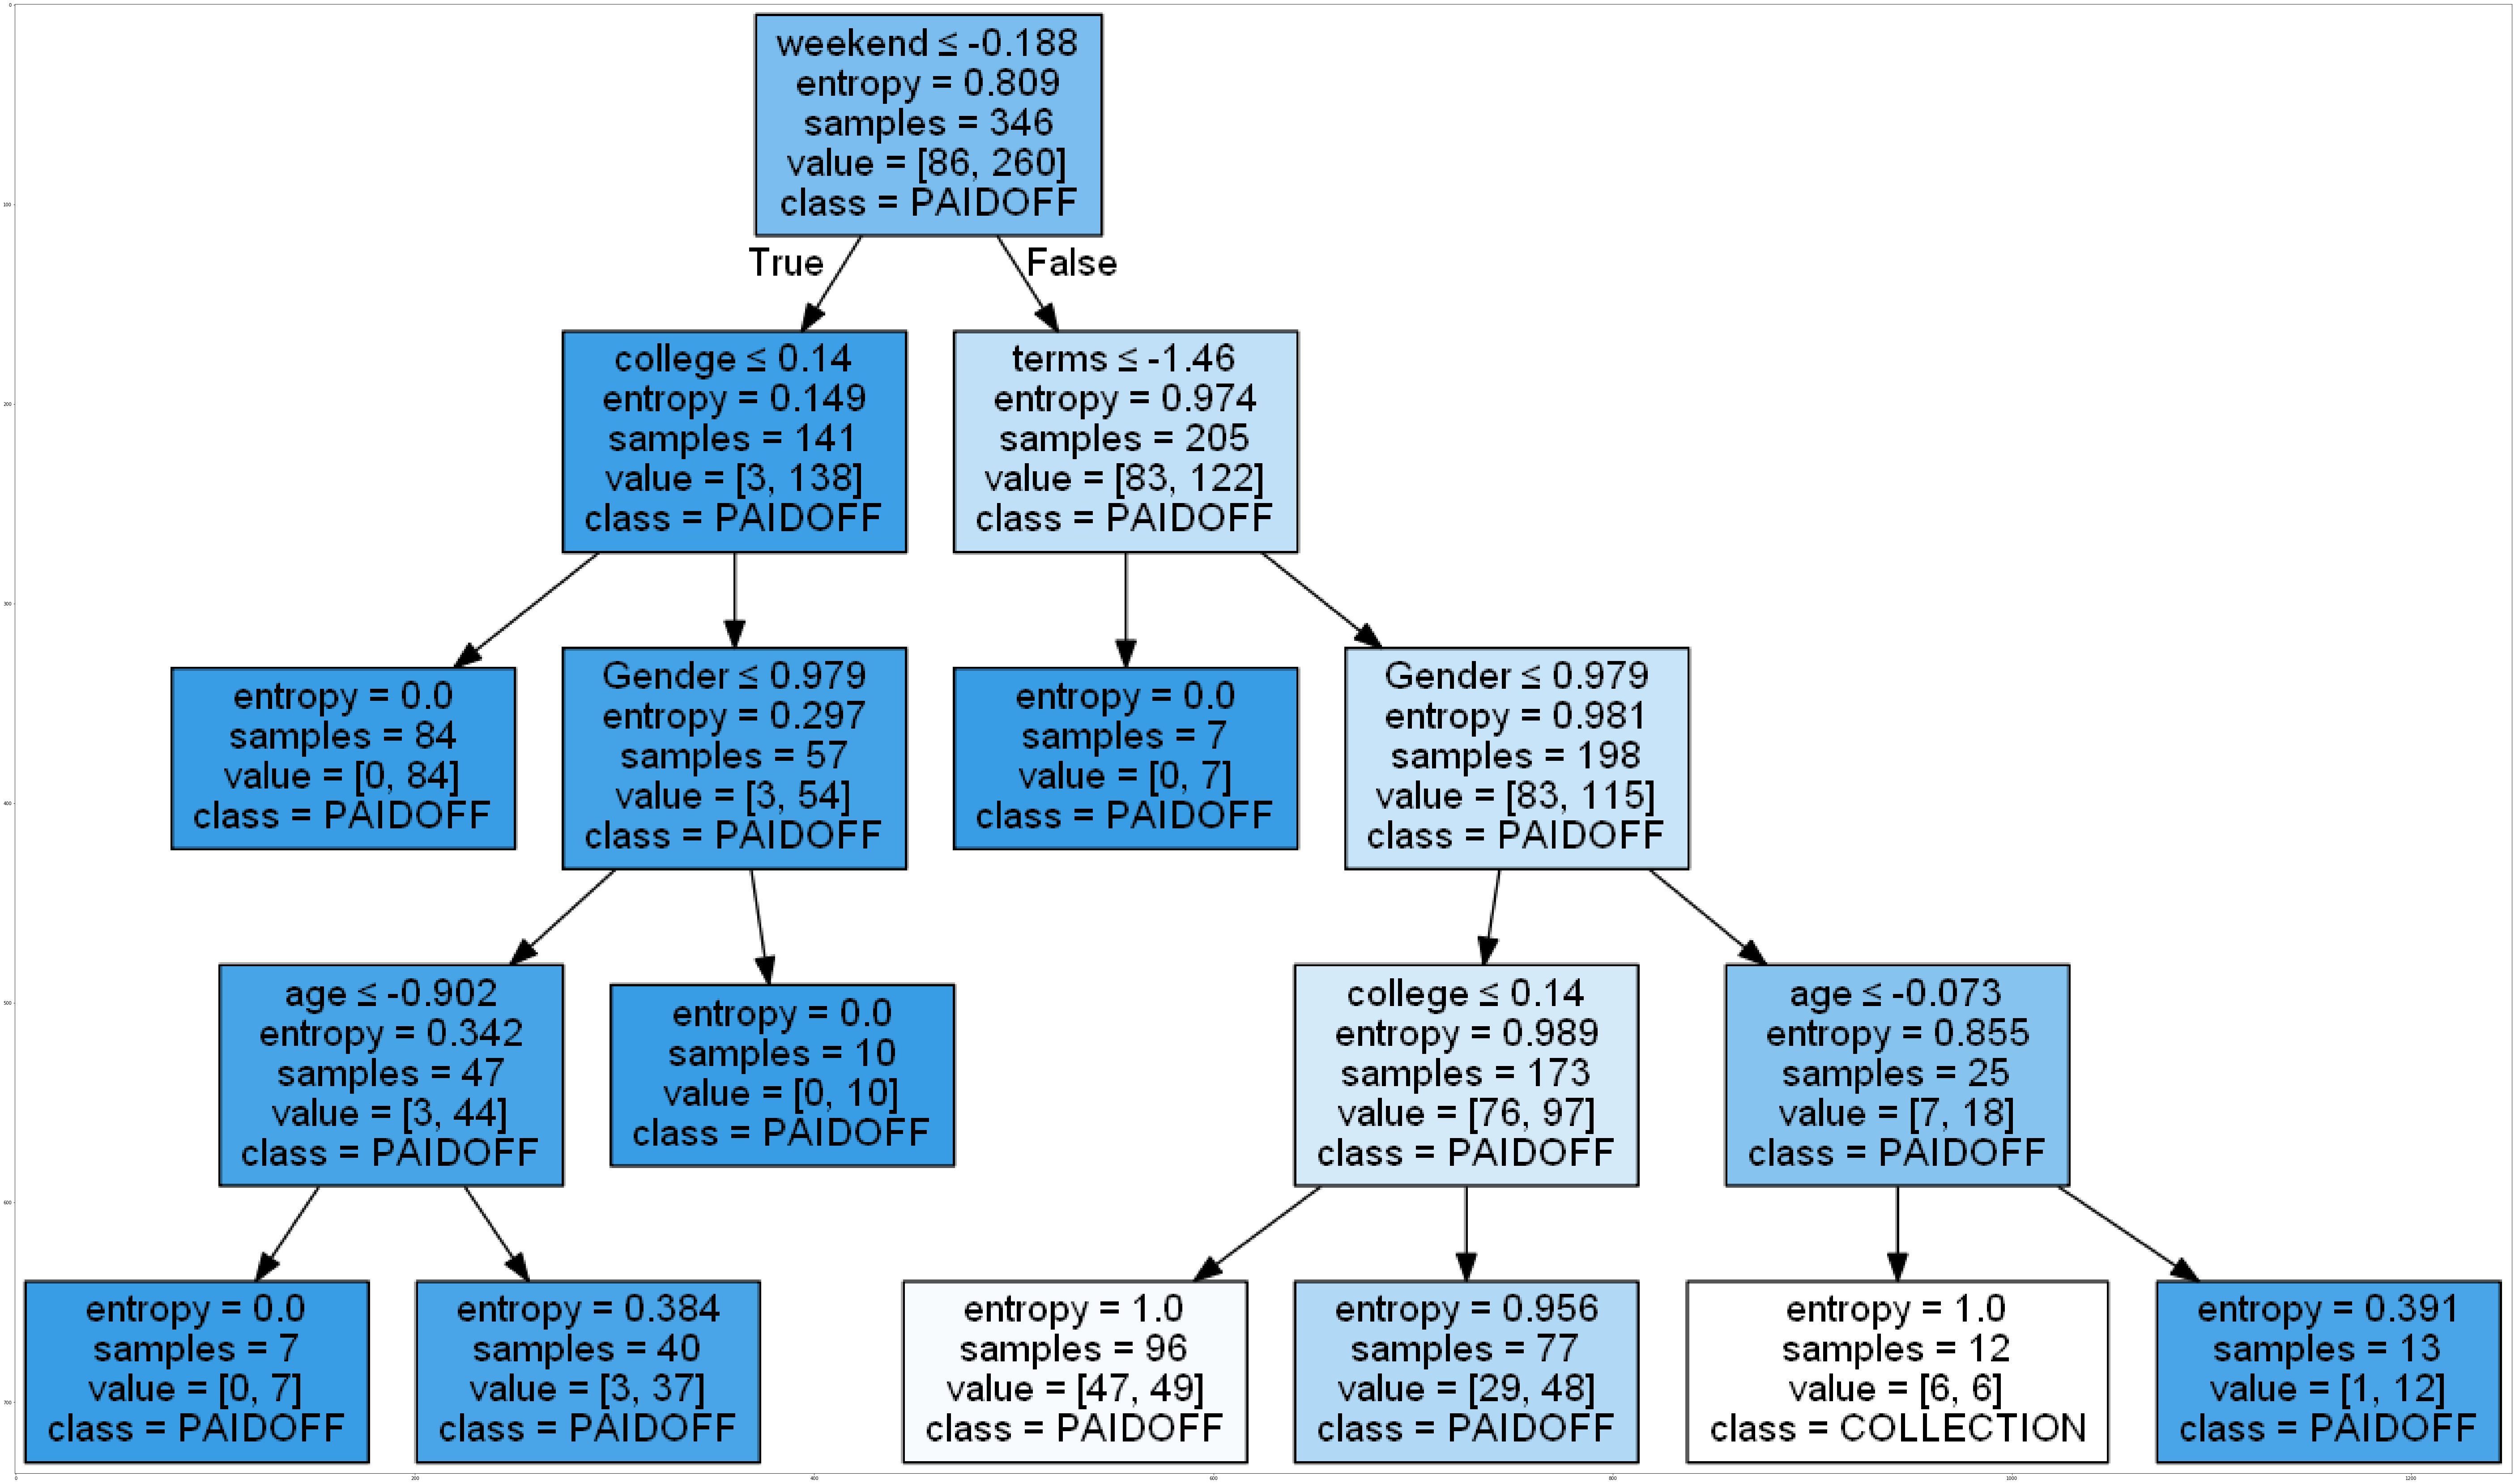

In [52]:
# Decision Tree
DT_Algo(X_TrainSet_Features, X_TrainSet, y_TrainSet, X_TestSet, y_TestSet)

The Jaccard Score of function sigmoid is: 0.5487
The Average F1-Score of function sigmoid is: 0.6304
Confusion Matrix, without Normalization
Confusion Matrix of function 'linear':
 [[ 0 14]
 [ 0 40]]
Classification Report of function 'linear':
               precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54

-------------------------------------------------------------------------------------------------------
The Jaccard Score of function sigmoid is: 0.5737
The Average F1-Score of function sigmoid is: 0.6831
Confusion Matrix, without Normalization
Confusion Matrix of function 'poly':
 [[ 2 12]
 [ 2 38]]
Classification Report of function 'poly':
               precision    recall  f1-score   support

  COLLECTION       0.50     

C:\Users\Administrator\anaconda3\envs\py3env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\py3env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\py3env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

-------------------------------------------------------------------------------------------------------


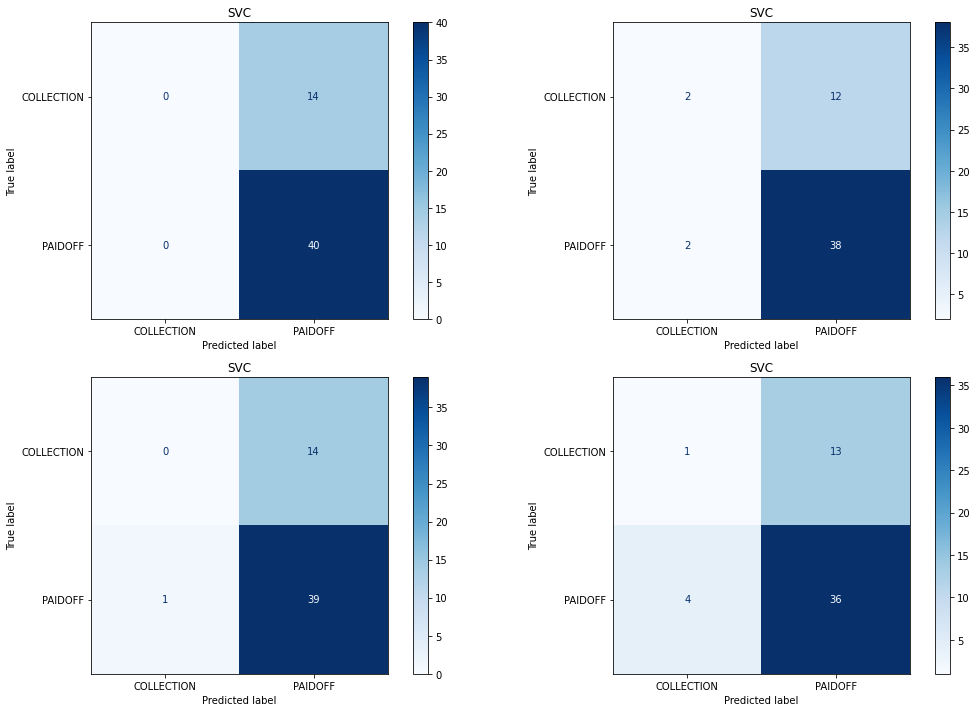

In [53]:
# Support Vector Machine
SVM_Algo(X_TrainSet, y_TrainSet, X_TestSet, y_TestSet, normalize=False, cmap=plt.cm.Blues)

The Probability Estimation of All classes:
 [[0.25 0.75]
 [0.4  0.6 ]
 [0.43 0.57]
 [0.47 0.53]
 [0.45 0.55]
 [0.45 0.55]
 [0.45 0.55]
 [0.48 0.52]
 [0.39 0.61]
 [0.44 0.56]]
The Jaccard Score is: 0.5487
The Average F1-Score is: 0.6304
Log Loss: 0.5566084946309205
Confusion Matrix, without Normalization
Confusion Matrix:
 [[ 0 14]
 [ 0 40]]
Classification Report:
               precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



C:\Users\Administrator\anaconda3\envs\py3env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\py3env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\py3env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

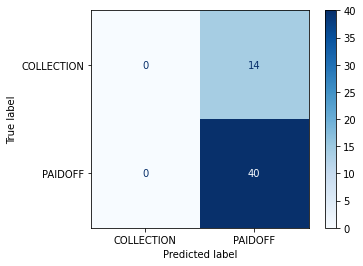

In [54]:
# Logistic Regression
LogisticRegression_Algo(X_TrainSet, y_TrainSet, X_TestSet, y_TestSet, normalize=False, cmap=plt.cm.Blues)

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.5832  | 0.7007   | NA      |
| Decision Tree      | 0.6183  | 0.7284   | NA      |
| SVM                | 0.5737  | 0.6831   | NA      |
| LogisticRegression | 0.5487  | 0.6304   | 0.5566  |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
